<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0606/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/tibaml0606/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/tibaml0606/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7fbb90ae6b10>)

In [2]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
predict_df = pd.read_csv("test.csv", encoding="utf-8")

In [3]:
predict_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
datas = pd.concat([train_df, predict_df], axis=0, ignore_index=True)
datas = datas.drop(["PassengerId", "Survived"], axis=1)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# 資料預處理
# Step1. 填補空值
# 1.1 check有多少個空值
s = datas.isna().sum()
# s[s!=0]: filter操作
s[s != 0].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [6]:
# 1.2 check 每一個欄位是哪一種型態
# a. 數值: Age, SibSp, Parch, Ticket(#share), Fare
# b. 類別: Pclass, Name(mid), Sex, Cabin(first), Embarked
# 補空值(最可能出現的值)
# 類別: 最常出現的值
# 數值: 絕對不是平均值, 而是中位數!!! 不是因為平均對中位數有什麼影響! 他們本就是兩種不同統計值! 我們的需求是最可能的值(不大不小的值)

In [7]:
# 處理一下 ticket/name/cabin
def cabinchange(c):
    if pd.isna(c):
        return None
    else:
        return c[0]
datas["Cabin"] = datas["Cabin"].apply(cabinchange)

In [8]:
counts = datas["Ticket"].value_counts()
def ticketchange(t):
    if pd.isna(t):
        return None
    else:
        return counts[t]
datas["Ticket"] = datas["Ticket"].apply(ticketchange)

In [9]:
import re
# n = "Braund, Mr. Owen Harris"
# .+: 任意一個字一次以上 ,: 逗號 (.+): 任意一個字一次以上, 並且group起來 \.: 點 .+: 任意一個字一次以上
def namechange(n):
    pat = r".+,(.+)\..+"
    return re.match(pat, n).group(1).strip()
datas["Name"].apply(namechange)

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object

In [10]:
# n = "Braund, Mr. Owen Harris"
def namechange(n):
    return n.split(",")[-1].split(".")[0].strip()
datas["Name"] = datas["Name"].apply(namechange)

In [11]:
# 類別: 最常出現
most = datas["Embarked"].value_counts().idxmax()
datas["Embarked"] = datas["Embarked"].fillna(most)
# check一下還缺多少
s = datas.isna().sum()
s[s != 0].sort_values(ascending=False)

Cabin    1014
Age       263
Fare        1
dtype: int64

In [12]:
# 數值: 中位數
med = datas.median().drop(["Pclass"])
datas = datas.fillna(med)
# check一下還缺多少
s = datas.isna().sum()
s[s != 0].sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Cabin    1014
dtype: int64

In [13]:
# One-Hot一定要做, 但是為了美觀, 我可以把太過稀少的去除掉
count = datas["Name"].value_counts()
reserved = count[count > 50].index
def namefilter(mid):
    if mid in reserved:
        return mid
    else:
        return None
datas["Name"] = datas["Name"].apply(namefilter)

In [14]:
# Pclass很特別: 雖然他是類別, 但他的類別是有大小關係的, 所以你不做可以
# 做不做各有各的好處, 但我試過了!!! 所以這裡我做
# Sex可以不做: 因為二值
pd.set_option('display.max_columns', 50)
datas = pd.get_dummies(datas)
datas = pd.get_dummies(datas, columns=["Pclass"])
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [15]:
datas["Family"] = datas["SibSp"] + datas["Parch"]
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [24]:
# 切開
import numpy as np
x = np.array(datas.iloc[:len(train_df)])
y = np.array(train_df["Survived"])
x_predict = np.array(datas.iloc[len(train_df):])

[Text(0.5, 0.875, 'Name_Miss <= 0.5\ngini = 0.477\nsamples = 563\nvalue = [542, 349]'),
 Text(0.25, 0.625, 'Name_Mr <= 0.5\ngini = 0.422\nsamples = 438\nvalue = [472, 205]'),
 Text(0.125, 0.375, 'Embarked_Q <= 0.5\ngini = 0.4\nsamples = 124\nvalue = [52, 136]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Pclass_3 <= 0.5\ngini = 0.242\nsamples = 314\nvalue = [420, 69]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Age <= 29.0\ngini = 0.44\nsamples = 125\nvalue = [70, 144]'),
 Text(0.625, 0.375, 'Ticket <= 4.5\ngini = 0.468\nsamples = 99\nvalue = [64, 107]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Pclass_3 <= 0.5\ngini = 0.24\nsamples = 26\nvalue = [6, 37]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

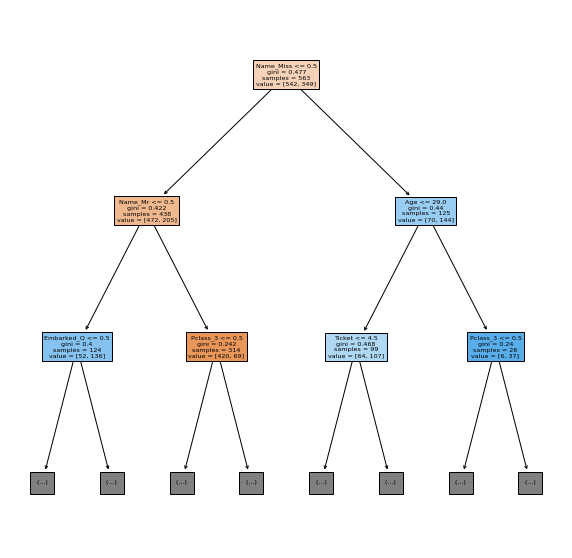

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=5, n_jobs=-1)
clf.fit(x, y)
plt.figure(figsize=(10, 10))
# 你可以挑選十顆裡面的某科把它畫出來, 看一下什麼叫做略有不同
plot_tree(clf.estimators_[3], feature_names=datas.columns, filled=True, max_depth=2)